In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

search_folder = "/content/drive/MyDrive/healthcare_dataset.xlsx"
csv_files = []
for root, dirs, files in os.walk(search_folder):
    for f in files:
        if f.lower().endswith('.csv'):
            csv_files.append(os.path.join(root, f))

print("Found CSVs:")
for i, p in enumerate(csv_files):
    print(i, p)


[c for c in csv_files if 'health' in c.lower()][:10]


Found CSVs:


[]

In [ ]:
#TASK 1

In [2]:
import pandas as pd
file_path ="/content/drive/MyDrive/healthcare_dataset.xlsx"

print("Using file:", file_path)
df = pd.read_excel(file_path, nrows=5)
print(df.head())
print("\nColumns:", df.columns.tolist())


Using file: /content/drive/MyDrive/healthcare_dataset.xlsx
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admissio

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/content/drive/MyDrive/healthcare_dataset.xlsx"
df = pd.read_excel(file_path)

df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


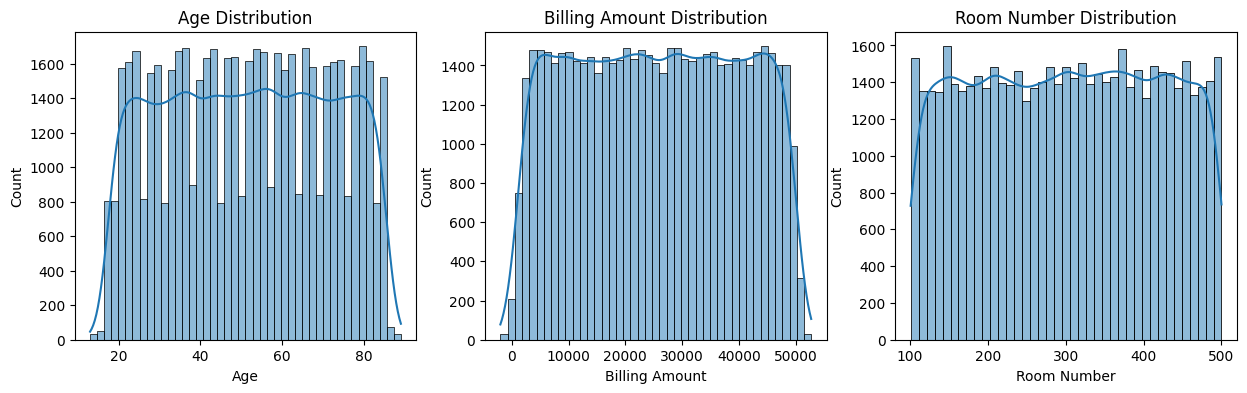

In [4]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")

plt.subplot(1,3,2)
sns.histplot(df['Billing Amount'], kde=True)
plt.title("Billing Amount Distribution")

plt.subplot(1,3,3)
sns.histplot(df['Room Number'], kde=True)
plt.title("Room Number Distribution")

plt.show()


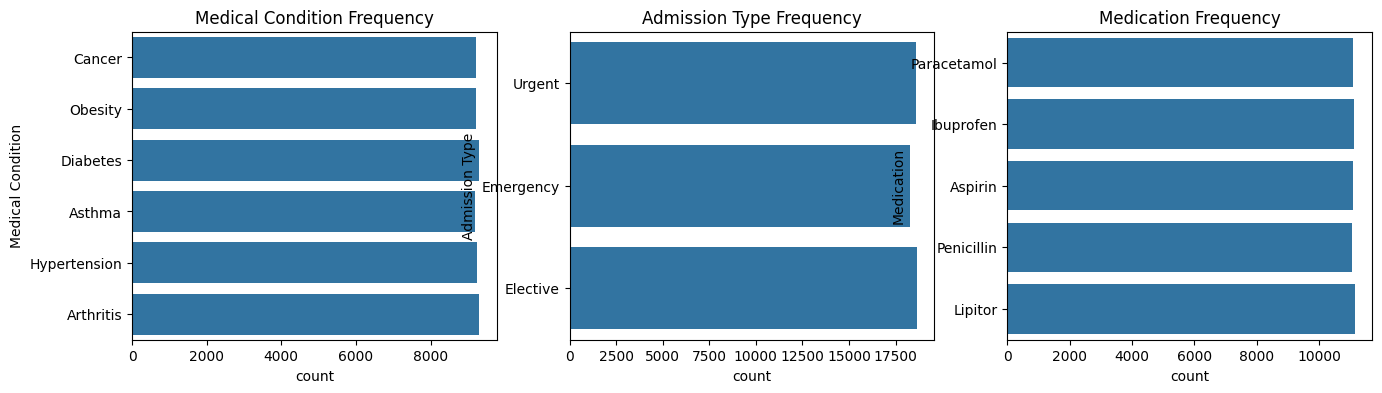

In [5]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.countplot(y=df['Medical Condition'])
plt.title("Medical Condition Frequency")

plt.subplot(1,3,2)
sns.countplot(y=df['Admission Type'])
plt.title("Admission Type Frequency")

plt.subplot(1,3,3)
sns.countplot(y=df['Medication'])
plt.title("Medication Frequency")

plt.show()


In [ ]:
#TASK 2

In [6]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

df_ml = df.copy()

drop_cols = ['Name','Doctor','Hospital','Date of Admission','Discharge Date']
df_ml = df_ml.drop(columns=drop_cols)

df_ml = pd.get_dummies(df_ml, drop_first=True)

# Split
from sklearn.model_selection import train_test_split

X = df_ml.drop('Test Results_Normal', axis=1, errors='ignore')
y = df['Test Results']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Abnormal       0.58      0.60      0.59      3726
Inconclusive       1.00      1.00      1.00      3671
      Normal       0.58      0.57      0.58      3703

    accuracy                           0.72     11100
   macro avg       0.72      0.72      0.72     11100
weighted avg       0.72      0.72      0.72     11100

CONFUSION MATRIX:


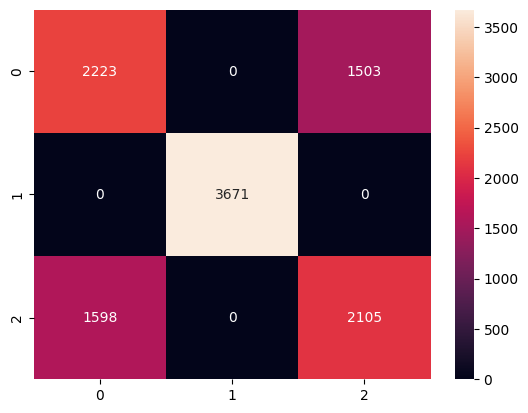

In [8]:
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

print("CONFUSION MATRIX:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


In [9]:
pred_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

pred_df.head(10)


,Actual,Predicted
0,Inconclusive,Inconclusive
1,Normal,Abnormal
2,Inconclusive,Inconclusive
3,Normal,Normal
4,Inconclusive,Inconclusive
5,Inconclusive,Inconclusive
6,Abnormal,Abnormal
7,Abnormal,Normal
8,Inconclusive,Inconclusive
9,Inconclusive,Inconclusive


In [ ]:
#TASK 3

In [10]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.03, random_state=42)
df['Anomaly'] = iso.fit_predict(df[['Billing Amount']])

df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

anomalies = df[df['Anomaly'] == 'Anomaly']
print("Detected anomalies:", len(anomalies))

anomalies[['Name','Billing Amount','Medical Condition','Admission Type']]


Detected anomalies: 1647


,Name,Billing Amount,Medical Condition,Admission Type
8,JASmINe aGuIlaR,50119.222792,Asthma,Elective
20,tIMOTHY burNs,42.514589,Asthma,Elective
40,chRiSTOPHer LEe,49943.278499,Hypertension,Emergency
67,jOhN hARTmAN,49402.298373,Hypertension,Elective
123,DR. LaUreN ClaRk DDs,49833.707718,Cancer,Elective
...,...,...,...,...
55334,jENNiFEr poWELl,658.391555,Cancer,Urgent
55342,TERRy romerO,49358.951102,Diabetes,Emergency
55346,pAmElA NoRmAn,51975.968135,Arthritis,Urgent
55352,jEnniFer teRrY,49460.921911,Diabetes,Urgent


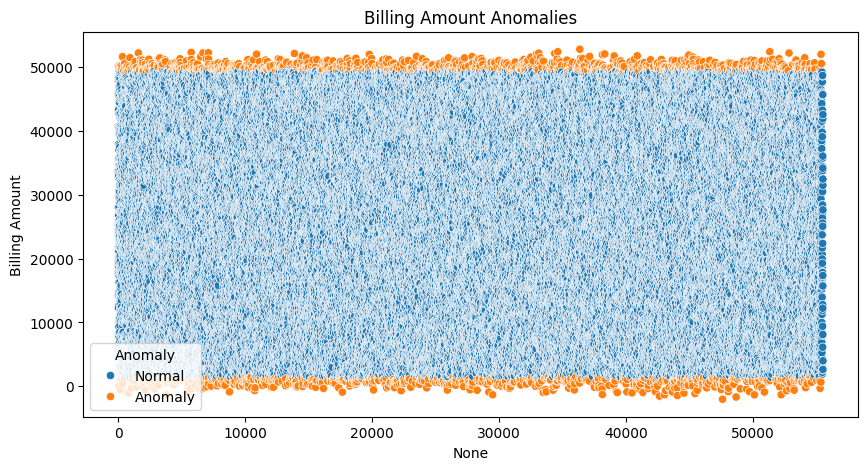

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.index, y=df['Billing Amount'], hue=df['Anomaly'])
plt.title("Billing Amount Anomalies")
plt.show()


In [ ]:
# “The anomaly detection model identified unusually high billing amounts (top 3% of data). These likely represent rare expensive medical cases such as cancer or emergency admissions requiring prolonged care.”

In [ ]:
#TASK 4

In [12]:
def doctor_recommendation(age, condition, medication, prediction):
    advice = ""

    if prediction == "Normal":
        advice = "Your test results are normal. Maintain a healthy lifestyle and continue regular checkups."
    elif prediction == "Abnormal":
        advice = "Your test results show abnormal findings. Please consult a specialist immediately for further evaluation."
    else:
        advice = "The results are inconclusive. Additional diagnostic tests are recommended to clarify the condition."

    return f"""
    AI Doctor Recommendation
    -------------------------
    Age: {age}
    Condition: {condition}
    Medication: {medication}
    Predicted Result: {prediction}

    Advice: {advice}
    """
sample = df.iloc[0]
print(doctor_recommendation(
    sample['Age'],
    sample['Medical Condition'],
    sample['Medication'],
    sample['Test Results']
))



    AI Doctor Recommendation
    -------------------------
    Age: 30
    Condition: Cancer
    Medication: Paracetamol
    Predicted Result: Normal

    Advice: Your test results are normal. Maintain a healthy lifestyle and continue regular checkups.
    
